In [31]:
import pandas as pd 
import seaborn as sns 
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pickle 
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
data=pd.read_csv('text_data.csv',encoding='latin1')

In [4]:
data

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


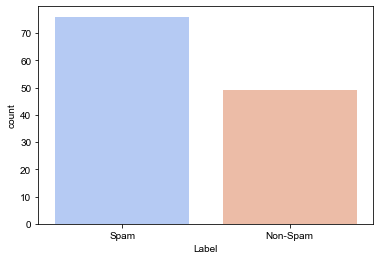

In [5]:
sns.countplot(x='Label',data=data,palette='coolwarm')
sns.set_style('darkgrid')

In [6]:
data=data.drop('S. No.',axis=1)

In [7]:
data

,Message_body,Label
0,"UpgrdCentre Orange customer, you may now claim...",Spam
1,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,Congrats! Nokia 3650 video camera phone is you...,Spam
3,URGENT! Your Mobile number has been awarded wi...,Spam
4,Someone has contacted our dating service and e...,Spam
...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,Try to do something dear. You read something f...,Non-Spam
122,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [8]:
stopwords=stopwords.words('english')

In [9]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
morestopwords=['U','u','c']

In [11]:
stopwords=stopwords+morestopwords

In [12]:
def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stopwords)
    return text
    


In [13]:
data['Message_body'] = data['Message_body'].apply(remove_stopwords)
data.head()

,Message_body,Label
0,"UpgrdCentre Orange customer, may claim FREE CA...",Spam
1,"Loan purpose £500 - £75,000. Homeowners + Tena...",Spam
2,Congrats! Nokia 3650 video camera phone Call 0...,Spam
3,URGENT! Your Mobile number awarded £2000 prize...,Spam
4,Someone contacted dating service entered phone...,Spam


In [14]:
stemmer=nltk.SnowballStemmer("english")


In [15]:
def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [16]:
data['Message_body'] = data['Message_body'].apply(stemm_text)
data.head()

,Message_body,Label
0,"upgrdcentr orang customer, may claim free came...",Spam
1,"loan purpos £500 - £75,000. homeown + tenant w...",Spam
2,congrats! nokia 3650 video camera phone call 0...,Spam
3,urgent! your mobil number award £2000 prize gu...,Spam
4,someon contact date servic enter phone fanci y...,Spam


In [17]:
le = LabelEncoder()
le.fit(data['Label'])

data['Label'] = le.transform(data['Label'])
data.head()

,Message_body,Label
0,"upgrdcentr orang customer, may claim free came...",1
1,"loan purpos £500 - £75,000. homeown + tenant w...",1
2,congrats! nokia 3650 video camera phone call 0...,1
3,urgent! your mobil number award £2000 prize gu...,1
4,someon contact date servic enter phone fanci y...,1


In [18]:
x = data['Message_body']
y = data['Label']

In [19]:
x

0      upgrdcentr orang customer, may claim free came...
1      loan purpos £500 - £75,000. homeown + tenant w...
2      congrats! nokia 3650 video camera phone call 0...
3      urgent! your mobil number award £2000 prize gu...
4      someon contact date servic enter phone fanci y...
                             ...                        
120    7 wonder my world 7th you 6th ur style 5th ur ...
121                tri someth dear. you read someth exam
122    sun ah... thk mayb dun anythin on... thk book ...
123    symptom love: "1.u like listen song 2.u get st...
124       great. have safe trip. dont panic surrend all.
Name: Message_body, Length: 125, dtype: object

In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
120    0
121    0
122    0
123    0
124    0
Name: Label, Length: 125, dtype: int32

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)

In [22]:
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

87 87
38 38


In [23]:
vect = CountVectorizer( ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect.fit(x_train)

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2))

In [24]:
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [25]:
x_train_dtm

<87x6 sparse matrix of type '<class 'numpy.int64'>'
	with 75 stored elements in Compressed Sparse Row format>

In [26]:
rfc=RandomForestClassifier(random_state=0).fit(x_train_dtm,y_train)
y_pred_rfc=rfc.predict(x_test_dtm)

In [27]:
accuracy_score(y_test,y_pred_rfc)

0.868421052631579

<AxesSubplot:>

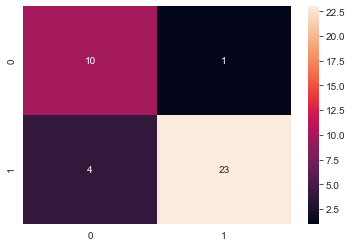

In [28]:
cm=confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(cm,annot=True,fmt='d')

In [30]:
pickle.dump(rfc,open('Spam_model.pkl','wb'))